In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os

In [2]:
csv_paths = [os.path.join('../', x, 'ft_results_combined.csv') for x in ["5M-MLM", "10M-MLM", "77M-MLM"]]

In [3]:
csv_paths

['../5M-MLM/ft_results_combined.csv',
 '../10M-MLM/ft_results_combined.csv',
 '../77M-MLM/ft_results_combined.csv']

In [4]:
dfs = [pd.read_csv(p) for p in csv_paths]

In [5]:
# only pick run_names from 77
run_names_to_use = dfs[-1].run_name.values

In [6]:
mlm_df = pd.concat(dfs, axis=0).reset_index(drop=True).sort_values(by='min_eval_loss')
mlm_df = mlm_df[mlm_df.run_name.isin(run_names_to_use)]

In [7]:
molnet_mean_cols = mlm_df.filter(like='mean').columns.tolist()

In [8]:
mlm_df

,run_name,min_eval_loss,hidden_size,attention_probs_dropout_prob,hidden_dropout_prob,intermediate_size,num_attention_heads,num_hidden_layers,learning_rate,pretraining_task,...,lipo_test_pearsonr_std,lipo_test_rmse_std,tox21_valid_roc_auc_score_mean,tox21_valid_average_precision_score_mean,tox21_valid_roc_auc_score_std,tox21_valid_average_precision_score_std,tox21_test_roc_auc_score_mean,tox21_test_average_precision_score_mean,tox21_test_roc_auc_score_std,tox21_test_average_precision_score_std
20,run_45,0.136374,384,0.109,0.144,464,12,3,0.000141,77M-MLM,...,0.023401,0.012898,0.705079,0.413250,0.002234,0.002803,0.735437,0.331569,0.002723,0.002399
14,run_45,0.147017,384,0.109,0.144,464,12,3,0.000141,10M-MLM,...,0.013561,0.015164,0.776767,0.457633,0.010897,0.020736,0.740105,0.357602,0.006108,0.004955
16,run_19,0.168913,57,0.129,0.139,10476,3,5,0.000058,77M-MLM,...,0.016360,0.008643,0.704594,0.370884,0.006716,0.022498,0.722692,0.324485,0.010164,0.027839
9,run_45,0.180579,384,0.109,0.144,464,12,3,0.000141,5M-MLM,...,0.006065,0.003496,0.768428,0.480094,0.006041,0.012952,0.763433,0.344838,0.006190,0.006467
15,run_19,0.196440,57,0.129,0.139,10476,3,5,0.000058,10M-MLM,...,0.035551,0.023326,0.719655,0.398458,0.012787,0.025318,0.721121,0.352393,0.006249,0.023872
3,run_19,0.251964,57,0.129,0.139,10476,3,5,0.000058,5M-MLM,...,0.013406,0.008482,0.685707,0.414530,0.016974,0.014435,0.763036,0.348931,0.015341,0.007947
19,run_38,0.386785,126,0.109,0.279,456,3,2,0.000021,77M-MLM,...,0.022283,0.012488,0.770410,0.430292,0.011813,0.024791,0.745829,0.302185,0.010798,0.004848
18,run_39,0.421750,209,0.176,0.128,3968,11,3,0.000002,77M-MLM,...,0.015542,0.012064,0.779049,0.435612,0.008611,0.021197,0.745281,0.316157,0.017602,0.019095
10,run_39,0.429169,209,0.176,0.128,3968,11,3,0.000002,10M-MLM,...,0.009715,0.006544,0.774108,0.415123,0.007640,0.011772,0.745301,0.298567,0.015782,0.015021
13,run_38,0.457947,126,0.109,0.279,456,3,2,0.000021,10M-MLM,...,0.021279,0.016272,0.735398,0.401960,0.009267,0.021842,0.753726,0.345733,0.010551,0.016043


In [14]:
# sns.pairplot(mlm_df[["min_eval_loss"]+molnet_mean_cols])

In [10]:
# mlm_df.to_csv('mlm_results.csv', index=False)

In [9]:
import matplotlib.pyplot as plt

In [10]:
molnet_mean_cols

['bace_classification_valid_roc_auc_score_mean',
 'bace_classification_valid_average_precision_score_mean',
 'bace_classification_test_roc_auc_score_mean',
 'bace_classification_test_average_precision_score_mean',
 'bace_regression_valid_pearsonr_mean',
 'bace_regression_valid_rmse_mean',
 'bace_regression_test_pearsonr_mean',
 'bace_regression_test_rmse_mean',
 'bbbp_valid_roc_auc_score_mean',
 'bbbp_valid_average_precision_score_mean',
 'bbbp_test_roc_auc_score_mean',
 'bbbp_test_average_precision_score_mean',
 'clearance_valid_pearsonr_mean',
 'clearance_valid_rmse_mean',
 'clearance_test_pearsonr_mean',
 'clearance_test_rmse_mean',
 'clintox_valid_roc_auc_score_mean',
 'clintox_valid_average_precision_score_mean',
 'clintox_test_roc_auc_score_mean',
 'clintox_test_average_precision_score_mean',
 'delaney_valid_pearsonr_mean',
 'delaney_valid_rmse_mean',
 'delaney_test_pearsonr_mean',
 'delaney_test_rmse_mean',
 'lipo_valid_pearsonr_mean',
 'lipo_valid_rmse_mean',
 'lipo_test_pearso

In [ ]:
molnet_name_mapping = {
    "bace": "BACE"
}

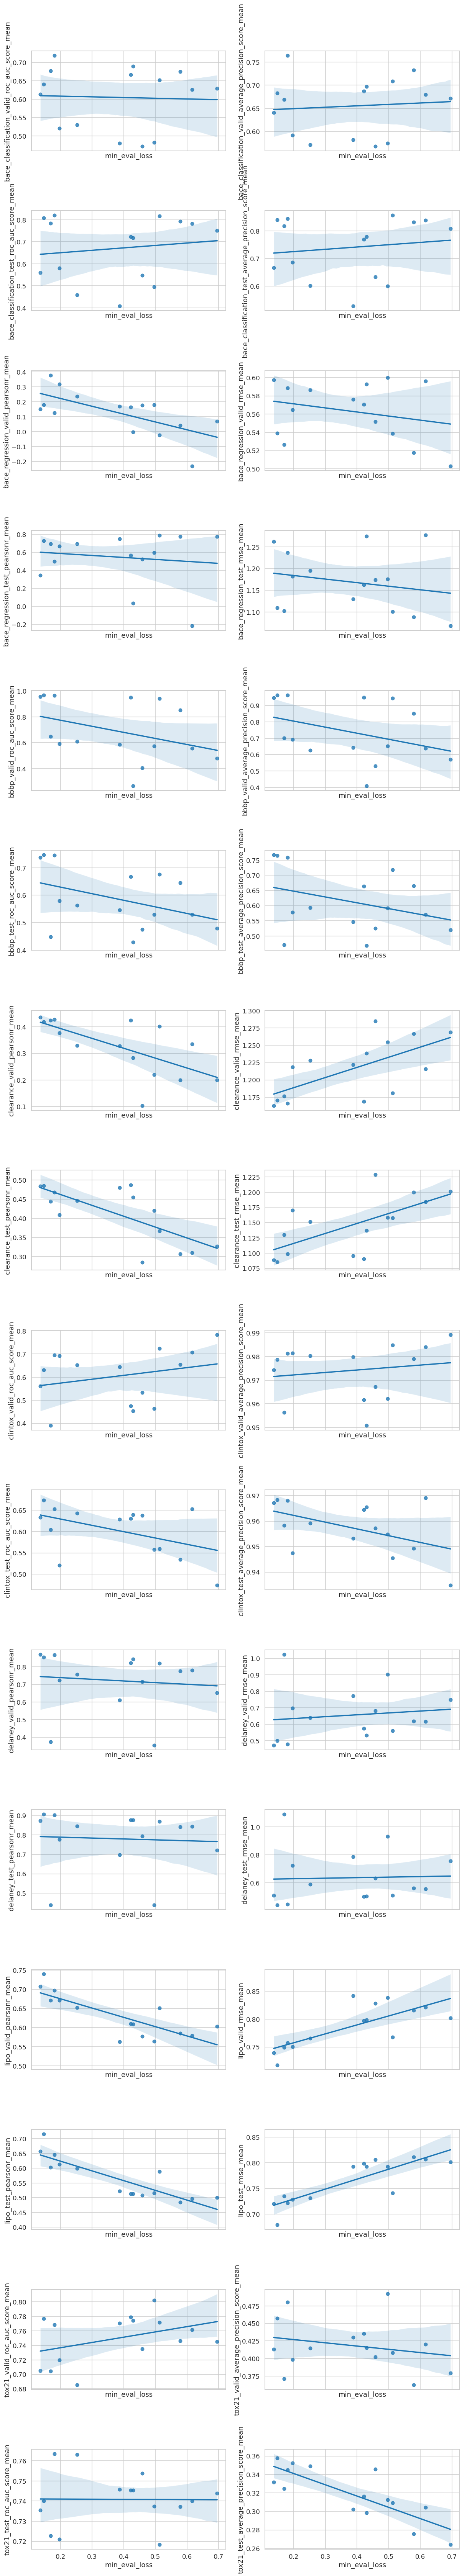

In [13]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, axes = plt.subplots(len(molnet_mean_cols)//2, 2, figsize=(20, 120), sharex=True)
for i in range(len(molnet_mean_cols)):
    sns.regplot(data=mlm_df, x='min_eval_loss', y=molnet_mean_cols[i], ax=axes.flatten()[i])
fig.subplots_adjust(hspace=0.6)
# plt.savefig('mlm_means.png', dpi=200)